In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('energydata_complete.csv',index_col='date',
                infer_datetime_format=True)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

<AxesSubplot:xlabel='date'>

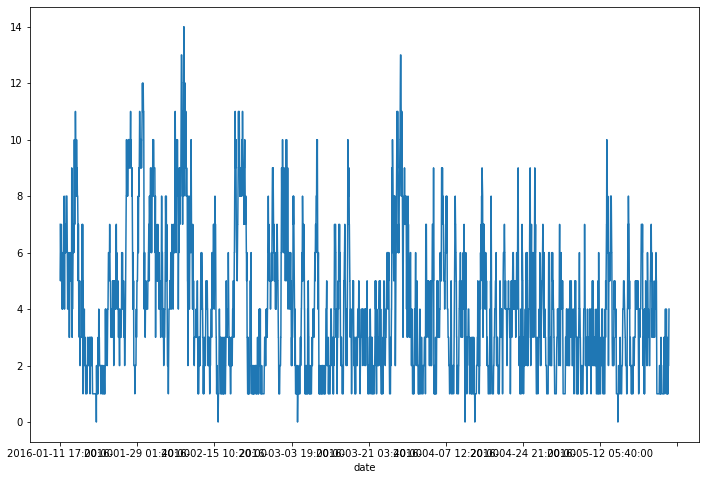

In [4]:
df['Windspeed'].plot(figsize=(12,8))

<AxesSubplot:xlabel='date'>

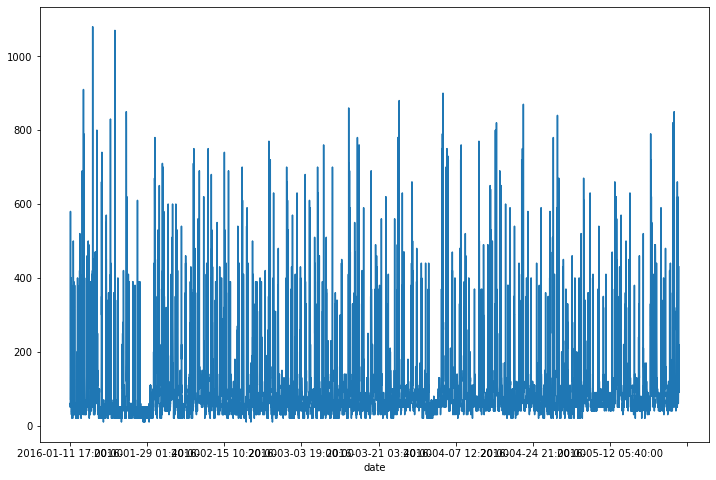

In [5]:
df['Appliances'].plot(figsize=(12,8))

In [6]:
len(df)

19735

In [8]:
df = df.loc['2016-05-01':]

In [9]:
df = df.round(2)

In [11]:
len(df)

3853

if we want to forecast for two days and test it, and if we want one day back to feed. also, data is collected every 10 min

so, 24*60/10 = 144 datapoints recorded in a day

test size  = 144*2 = 288 observations

In [13]:
test_ind = 144*2
test_ind

288

In [14]:
# Notice the minus sign in our indexing

train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [15]:
train

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.40,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.50,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.50,23.20,36.50,19.70,37.59,...,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81
2016-05-01 00:30:00,50,0,21.10,38.09,18.29,41.50,23.20,36.50,19.70,37.50,...,19.17,38.50,4.25,763.75,87.00,2.50,34.50,2.25,47.00,47.00
2016-05-01 00:40:00,60,0,21.10,38.03,18.29,41.56,23.20,36.50,19.70,37.50,...,19.17,38.63,4.23,763.77,87.33,2.67,32.67,2.27,8.06,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-25 17:20:00,120,0,24.50,37.22,24.13,34.30,25.20,37.64,24.36,38.29,...,21.89,37.03,16.17,756.17,52.67,1.33,31.33,6.43,33.46,33.46
2016-05-25 17:30:00,190,0,24.50,37.16,24.10,34.30,25.20,37.55,24.29,38.16,...,21.89,37.20,16.25,756.15,53.50,1.50,33.50,6.75,0.43,0.43
2016-05-25 17:40:00,160,0,24.50,37.43,24.10,34.43,25.14,37.28,24.29,38.00,...,21.89,37.33,16.33,756.13,54.33,1.67,35.67,7.07,16.67,16.67


In [16]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
scaler.fit(train)

MinMaxScaler()

In [20]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
# define generator
length = 144 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [23]:
len(scaled_train)

3565

In [24]:
len(generator) 

3421

In [25]:
X,y = generator[0]

In [27]:
X.flatten()

array([0.03896104, 0.        , 0.13798978, ..., 0.14319527, 0.75185111,
       0.75185111])

In [28]:
y

array([[0.03896104, 0.        , 0.30834753, 0.29439421, 0.16038492,
        0.49182278, 0.0140056 , 0.36627907, 0.24142857, 0.24364791,
        0.12650602, 0.36276002, 0.12      , 0.28205572, 0.06169297,
        0.15759185, 0.34582624, 0.39585974, 0.09259259, 0.39649608,
        0.18852459, 0.96052632, 0.59210526, 0.1       , 0.58333333,
        0.13609467, 0.4576746 , 0.4576746 ]])

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [33]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               51600     
                                                                 
 dense_1 (Dense)             (None, 28)                2828      
                                                                 
Total params: 54,428
Trainable params: 54,428
Non-trainable params: 0
_________________________________________________________________


In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=batch_size)

In [35]:
model.fit_generator(generator,epochs=6,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/6


C:\Users\AUTHOR~1\AppData\Local\Temp/ipykernel_9024/645542381.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=6,


3421/3421 [==============================] - 126s 37ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 2/6
3421/3421 [==============================] - 125s 37ms/step - loss: 0.0079 - val_loss: 0.0093
Epoch 3/6
3421/3421 [==============================] - 125s 37ms/step - loss: 0.0075 - val_loss: 0.0084
Epoch 4/6
3421/3421 [==============================] - 125s 36ms/step - loss: 0.0074 - val_loss: 0.0082
Epoch 5/6
3421/3421 [==============================] - 125s 37ms/step - loss: 0.0073 - val_loss: 0.0082
Epoch 6/6
3421/3421 [==============================] - 125s 36ms/step - loss: 0.0072 - val_loss: 0.0081


## Evaluvate test data

<AxesSubplot:>

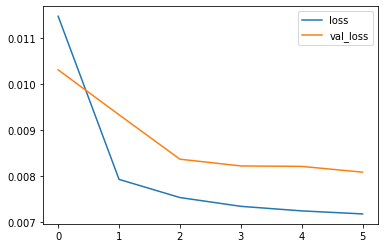

In [36]:
model.history.history.keys()
losses = pd.DataFrame(model.history.history)
losses.plot()

In [37]:
first_eval_batch = scaled_train[-length:]

In [38]:
first_eval_batch

array([[0.1038961 , 0.        , 0.72231687, ..., 0.53550296, 0.15909546,
        0.15909546],
       [0.11688312, 0.        , 0.73424191, ..., 0.52662722, 0.40344207,
        0.40344207],
       [0.11688312, 0.        , 0.73424191, ..., 0.51775148, 0.20452271,
        0.20452271],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

In [39]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [40]:
model.predict(first_eval_batch)

array([[8.5643910e-02, 1.6094998e-02, 7.0051789e-01, 3.8100806e-01,
        5.4426312e-01, 4.1800547e-01, 4.1152075e-01, 4.2882729e-01,
        7.1538180e-01, 4.0412787e-01, 2.9446083e-01, 3.6564296e-01,
        6.7115712e-01, 2.7067959e-05, 6.1219448e-01, 4.1680002e-01,
        5.0792253e-01, 3.2807648e-01, 5.1465911e-01, 3.6112264e-01,
        6.4177120e-01, 5.3176403e-01, 4.3827033e-01, 2.1371482e-01,
        6.0685492e-01, 5.6163323e-01, 4.9027359e-01, 4.9028140e-01]],
      dtype=float32)

In [41]:
scaled_test[0]

array([0.19480519, 0.        , 0.70017036, 0.3920434 , 0.53007217,
       0.41064526, 0.40616246, 0.41913319, 0.72714286, 0.4115245 ,
       0.30722892, 0.36445121, 0.66777778, 0.        , 0.61119082,
       0.39840637, 0.51618399, 0.32953105, 0.53703704, 0.34024896,
       0.6057377 , 0.52631579, 0.41881579, 0.2       , 0.55283333,
       0.53372781, 0.76305783, 0.76305783])

In [42]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [43]:
test_predictions

[array([8.5643910e-02, 1.6094998e-02, 7.0051789e-01, 3.8100806e-01,
        5.4426312e-01, 4.1800547e-01, 4.1152075e-01, 4.2882729e-01,
        7.1538180e-01, 4.0412787e-01, 2.9446083e-01, 3.6564296e-01,
        6.7115712e-01, 2.7067959e-05, 6.1219448e-01, 4.1680002e-01,
        5.0792253e-01, 3.2807648e-01, 5.1465911e-01, 3.6112264e-01,
        6.4177120e-01, 5.3176403e-01, 4.3827033e-01, 2.1371482e-01,
        6.0685492e-01, 5.6163323e-01, 4.9027359e-01, 4.9028140e-01],
       dtype=float32),
 array([ 0.06562898,  0.01421563,  0.70076036,  0.37438372,  0.5524737 ,
         0.4105817 ,  0.40267137,  0.42801508,  0.7093997 ,  0.39481896,
         0.30020544,  0.3586332 ,  0.68592787, -0.00358702,  0.6097901 ,
         0.43507984,  0.50131816,  0.33717912,  0.5037789 ,  0.3749344 ,
         0.6611571 ,  0.53498536,  0.43733716,  0.22568642,  0.6174227 ,
         0.5884248 ,  0.48974872,  0.4920358 ], dtype=float32),
 array([ 0.05626588,  0.01092065,  0.7022579 ,  0.36690286,  0.56178045

In [44]:
scaled_test

array([[0.19480519, 0.        , 0.70017036, ..., 0.53372781, 0.76305783,
        0.76305783],
       [0.37662338, 0.        , 0.70017036, ..., 0.52840237, 0.62337402,
        0.62337402],
       [0.12987013, 0.        , 0.70017036, ..., 0.52366864, 0.08785271,
        0.08785271],
       ...,
       [0.32467532, 0.33333333, 0.87052811, ..., 0.86804734, 0.58415049,
        0.58415049],
       [0.51948052, 0.33333333, 0.87052811, ..., 0.86568047, 0.12627577,
        0.12627577],
       [0.53246753, 0.33333333, 0.87052811, ..., 0.86390533, 0.68260957,
        0.68260957]])

## Inverse Transformations and Compare

In [45]:
true_predictions = scaler.inverse_transform(test_predictions)

In [46]:
true_predictions

array([[ 85.9458106 ,   0.48284993,  24.50204003, ...,   8.09160157,
         24.50897153,  24.50936171],
       [ 70.53431697,   0.42646894,  24.50346334, ...,   8.54437915,
         24.48274336,  24.59702923],
       [ 63.32472716,   0.32761943,  24.51225371, ...,   9.00460182,
         24.39800662,  24.51473036],
       ...,
       [102.23223455,   1.63539771,  19.81379976, ..., -10.96888204,
         17.47060433,  19.75765922],
       [105.35203226,   1.61451593,  19.91287489, ..., -10.70404794,
         17.30840273,  19.72138177],
       [108.21079887,   1.59078721,  20.01408543, ..., -10.443229  ,
         17.14777077,  19.68525771]])

In [47]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)

In [48]:
true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,85.945811,0.482850,24.502040,37.554873,24.176961,34.517524,25.038258,36.883412,24.207673,37.626978,...,21.879159,37.682750,17.359217,756.224220,57.308545,2.137148,41.411295,8.091602,24.508972,24.509362
1,70.534317,0.426469,24.503463,37.371710,24.279347,34.267863,24.975074,36.868045,24.165798,37.421810,...,21.820406,37.982327,17.832233,756.297666,57.237624,2.256864,42.045362,8.544379,24.482743,24.597029
2,63.324727,0.327619,24.512254,37.164864,24.395402,34.057436,24.923769,36.838990,24.155263,37.234755,...,21.776228,38.278395,18.314255,756.297306,57.165245,2.379780,42.538123,9.004602,24.398007,24.514730
3,59.028230,0.258056,24.525874,37.012881,24.511265,33.844860,24.874423,36.802936,24.165899,37.060023,...,21.741725,38.564813,18.807992,756.256605,57.083411,2.505852,43.041509,9.446400,24.315322,24.431332
4,55.649627,0.205223,24.542408,36.896722,24.623553,33.643260,24.827616,36.765771,24.188010,36.895194,...,21.715246,38.843875,19.300936,756.170244,56.912931,2.633080,43.539703,9.867809,24.230538,24.346515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,95.081050,1.668542,19.624777,56.051249,29.951415,38.015845,21.560240,44.929148,17.488931,44.411303,...,11.848904,59.355115,-0.286243,787.526721,44.616228,3.517808,64.844403,-11.511216,17.798448,19.829349
284,98.819480,1.653398,19.717533,56.430925,30.016998,38.312068,21.603351,45.157534,17.459686,45.003387,...,11.784502,59.420687,-0.280063,787.392306,45.882762,3.502224,65.019484,-11.237914,17.634035,19.793751
285,102.232235,1.635398,19.813800,56.829863,30.075489,38.645247,21.642839,45.389488,17.432428,45.615687,...,11.719201,59.487547,-0.288233,787.246269,47.186560,3.481086,65.219162,-10.968882,17.470604,19.757659
286,105.352032,1.614516,19.912875,57.244612,30.127539,39.011306,21.679272,45.624030,17.406609,46.243896,...,11.653363,59.556346,-0.310969,787.090223,48.528699,3.455788,65.439982,-10.704048,17.308403,19.721382
